<a href="https://colab.research.google.com/github/LuisaPolicarpo/Project3/blob/main/Marta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# title.akas.tsv.gz - Contains the following information for titles:
# titleId (string) - a tconst, an alphanumeric unique identifier of the title
# ordering (integer) – a number to uniquely identify rows for a given titleId
# title (string) – the localized title
# region (string) - the region for this version of the title
# language (string) - the language of the title
# types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
# attributes (array) - Additional terms to describe this alternative title, not enumerated
# isOriginalTitle (boolean) – 0: not original title; 1: original title

# Marta
# title.basics.tsv.gz - Contains the following information for titles:
# tconst (string) - alphanumeric unique identifier of the title
# titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
# primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
# originalTitle (string) - original title, in the original language
# isAdult (boolean) - 0: non-adult title; 1: adult title
# startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
# endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
# runtimeMinutes – primary runtime of the title, in minutes
# genres (string array) – includes up to three genres associated with the title

# Marta
# title.crew.tsv.gz – Contains the director and writer information for all the titles in IMDb. Fields include:
# tconst (string) - alphanumeric unique identifier of the title
# directors (array of nconsts) - director(s) of the given title
# writers (array of nconsts) – writer(s) of the given title

# title.episode.tsv.gz – Contains the tv episode information. Fields include:
# tconst (string) - alphanumeric identifier of episode
# parentTconst (string) - alphanumeric identifier of the parent TV Series
# seasonNumber (integer) – season number the episode belongs to
# episodeNumber (integer) – episode number of the tconst in the TV series

# title.principals.tsv.gz – Contains the principal cast/crew for titles
# tconst (string) - alphanumeric unique identifier of the title
# ordering (integer) – a number to uniquely identify rows for a given titleId
# nconst (string) - alphanumeric unique identifier of the name/person
# category (string) - the category of job that person was in
# job (string) - the specific job title if applicable, else '\N'
# characters (string) - the name of the character played if applicable, else '\N'

#self-category: 
# Appear in titles with the genre Documentary
# Appear in titles with the keyword TV-special (e.g. the Academy Awards ceremony broadcast)
# Appear in titles with the keyword non-fiction (e.g. Talk-Shows)
# Are credited as "himself, herself, self, themselves" (e.g. in Making-of featurettes or Reality TV)
# are displayed in a separate section called "Self" and other roles will appear in their respective groupings.

# title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles
# tconst (string) - alphanumeric unique identifier of the title
# averageRating – weighted average of all the individual user ratings
# numVotes - number of votes the title has received

# name.basics.tsv.gz – Contains the following information for names:
# nconst (string) - alphanumeric unique identifier of the name/person
# primaryName (string)– name by which the person is most often credited
# birthYear – in YYYY format
# deathYear – in YYYY format if applicable, else '\N'
# primaryProfession (array of strings)– the top-3 professions of the person
# knownForTitles (array of tconsts) – titles the person is known for

In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import regex as re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

my_stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive

/content/drive/MyDrive


In [4]:
#IMDB_title.basics
title_basics = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_basics_p.pkl')
title_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9324309,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9324310,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9324311,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9324312,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [11]:
#IMDB_title.akas
title_akas = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_akas_p.pickle')
title_akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
33626383,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
33626384,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
33626385,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
33626386,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [ ]:
#IMDB_title.crew
title_crew = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_crew_p.pickle')
title_crew

In [4]:
#IMDB_title.ratings
title_ratings = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Projects/Project3_my copy/title_ratings_p.pickle')
title_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1920
1,tt0000002,5.8,260
2,tt0000003,6.5,1728
3,tt0000004,5.6,173
4,tt0000005,6.2,2541
...,...,...,...
1241069,tt9916690,7.4,6
1241070,tt9916720,5.3,270
1241071,tt9916730,9.0,6
1241072,tt9916766,6.7,21


In [5]:
title_ratings.corr()

,averageRating,numVotes
averageRating,1.000000,0.010738
numVotes,0.010738,1.000000


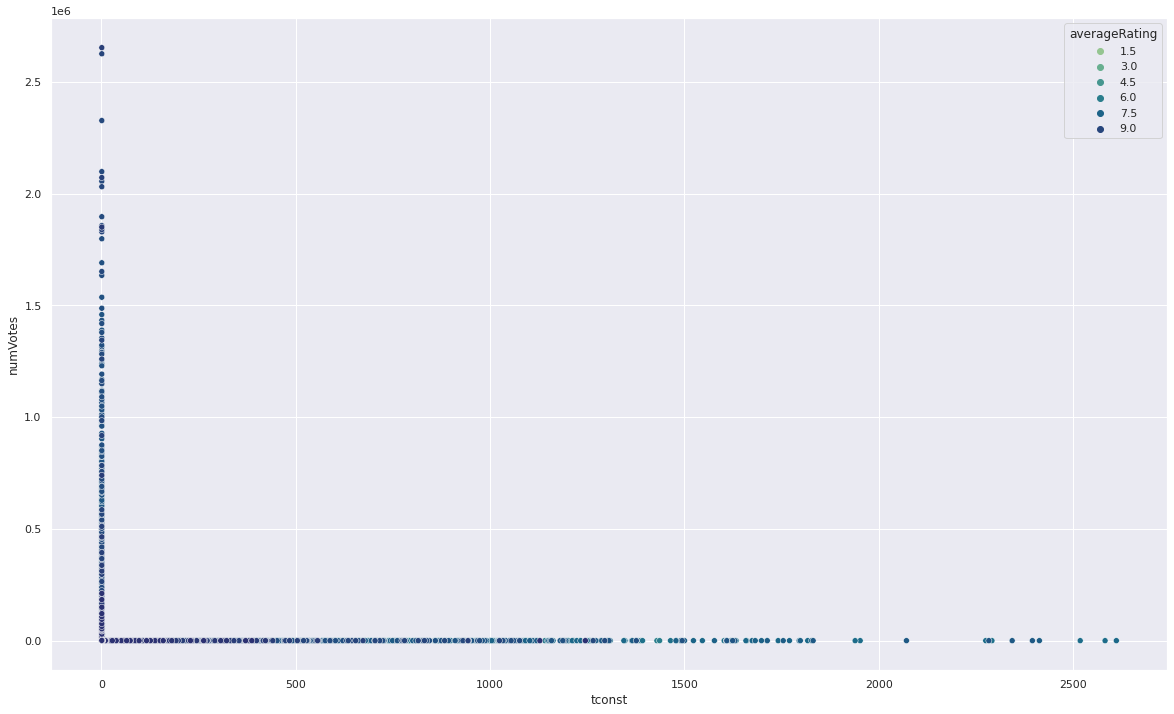

In [14]:
title_ratings_count = title_ratings.groupby(['averageRating','numVotes']).count().reset_index()
title_ratings_count

sns.set(rc={'figure.figsize':(20,12)})
sns.scatterplot(data = title_ratings_count, x= 'tconst', y = 'numVotes',  hue = 'averageRating', palette='crest')

In [ ]:
#Checks about tconts from title_basics in name_basics are ok
# condition = name_basics['tconst'] == 'tt0000001'
# condition.unique()

## Know the data

# M1) title_basics

In [ ]:
#Check the types of variables and null values
title_basics.info()

In [ ]:
# object ok = tconst, titleTyoe, primaryTitle, originalTitle

# isAdult: is bool, check if there are only 0 and 1

# runtimeMinutes : should be int

In [ ]:
#TODO=: convert runtimeminutes to int??
type(title_basics['runtimeMinutes'][0]) -> str

In [ ]:
#check which variables the isAdult column has
title_basics['isAdult'].unique()

In [ ]:
#check which variables the isAdult column has and count them
title_basics['isAdult'].value_counts()

In [ ]:
#countercheck
condition = title_basics['isAdult'] == 2019
condition.unique()

In [ ]:
# go to imbd site and check what happens in theses tv episodes: 
condition = title_basics['isAdult'] == 2019
title_basics.loc[condition]

# Answer:
# it's the year when they aired the episode for 2020, 2019, 1981, 2017, 2014, 2005

In [ ]:
#check if other tv episodes show the date as start year or if they are //N 
condition = title_basics['titleType'] == 'tvEpisode'
title_basics.loc[condition]

title_basics['startYear'].loc[condition].value_counts()
#title_basics['endYear'].loc[condition].value_counts()

#The startyear column has 1105935 /N for the titletype = tv episodes
#The endyear column is empty for all the titletype = tv episodes


In [ ]:
#TODO replace the years checked in the startYear column

In [ ]:
condition = title_basics['isAdult'] == 0 | 1
title_basics.loc[condition]

In [ ]:
condition = title_basics['isAdult'] == '0'
title_basics.loc[condition]

In [ ]:
#check value_counts other columns
#total entries: 9301902

title_basics['tconst'].nunique()
#9301902

#Are there any /N values?
condition = title_basics['tconst'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
#Answer: 0

In [ ]:
title_basics_count = title_basics['titleType'].value_counts()
title_basics_count
#11 unique values
# how many rows I can use from the dataset (are they usable)? are the other values /N?

In [ ]:
title_basics['primaryTitle'].nunique()
#4262092 unique values
#some are repeated

#Are there any /N values?
condition = title_basics['primaryTitle'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
#Answer: No

In [ ]:
title_basics['originalTitle'].nunique()
# 4282726 unique values (more 2634 than the primary title)
# some are repeated

# #Are there any /N values?
condition = title_basics['originalTitle'] == '/N'
condition.apply(lambda x : '1' if x == 1 else 0).sum()
# Answer: No

In [ ]:
title_basics['startYear'].value_counts()
# we have \N = 1243835 entries

In [ ]:
title_basics['endYear'].value_counts()
# we have \N = 9204461 entries out of 9301902, which means that only 97441 values are non-null which is only 1% ----- check if this is the same number as episodes

In [ ]:
title_basics['endYear'].apply(lambda x : '1' if x == r'\N' else 0).sum()

In [ ]:
TVseries = title_basics['titleType'] == 'tvEpisode'
TVseries.sum()
#there are 7018334 TVepisodes on the title_basics collumn

In [ ]:
TVseries =  (title_basics['titleType'] == 'tvEpisode') & (title_basics['endYear'] == r'\N')
TVseries.sum()

In [ ]:
check = (title_basics['endYear'] == r'\N') & (title_basics['titleType'] == 'tvEpisode')
title_basics.loc[check].count()

In [ ]:
check = (title_basics['startYear'] == r'\N') & (title_basics['titleType'] == 'tvEpisode')
title_basics.loc[check].count()

In [ ]:
# # on isAdult column - change all other than 0 and 1 to null

# def check_safety(rating):
#   safe_for_children = ''
#   if rating == 'G':
#     safe_for_children = 'yes'
#   else:
#     safe_for_children = 'no' 
#   return safe_for_children

# movies['safe_for_children'] = movies['content_rating'].apply(check_safety)
# movies.head()


In [ ]:
#There are no values on genres
title_basics['genres'].value_counts()

In [10]:
condition = title_basics[['isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']] == r'\N'
condition_pivot = condition.pivot_table(values = title_basics[['isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']], index = title_basics['titleType'], aggfunc = 'sum')
condition_pivot['total'] = title_basics['titleType'].value_counts()
condition_pivot

,endYear,genres,isAdult,runtimeMinutes,startYear,total
titleType,,,,,,
movie,625336,72006,0,230562,84015,625336
short,896614,190,0,315862,27318,896614
tvEpisode,7036854,305413,1,5881895,1110064,7036854
tvMiniSeries,24502,2734,0,28895,2951,45697
tvMovie,138011,11500,0,44492,3697,138011
tvPilot,2,2,0,2,0,2
tvSeries,156584,19175,0,141086,18035,233145
tvShort,10703,12,0,1256,97,10703
tvSpecial,38833,5581,0,20235,235,38834


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.barplot(data=condition_pivot, x = 'titleType')
# plt.show()

ax = condition_pivot.plot(kind='barh', stacked=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10,6))
ax = sns.barplot(x = condition_pivot.index.values, y = condition_pivot['endYear'], data = condition_pivot)
ax = sns.barplot(x = )
ax.tick_params(axis='x', rotation=-45)

In [69]:
title_basics['genres'].unique()

array(['\\N', nan], dtype=object)

# M2) Tile crew

In [ ]:
title_crew.info()

# M3) Akas

In [ ]:
title_akas

In [ ]:
condition1 = title_akas[['region', 'language']] != r'\N'
condition1_pivot = condition1.pivot_table(values = title_akas[['region', 'language']], index = title_akas['titleId'], aggfunc = 'count')
condition1_pivot['total'] = title_akas['titleId'].value_counts()
condition1_pivot

# M4) title_ratings

In [ ]:
title_ratings
#We have 1238672 titles rated
#There are no Null values
#How many movies/movies and shorts have been rated?

,tconst,averageRating,numVotes
0,tt0000001,5.7,1919
1,tt0000002,5.8,260
2,tt0000003,6.5,1727
3,tt0000004,5.6,173
4,tt0000005,6.2,2541
...,...,...,...
1238667,tt9916690,7.4,6
1238668,tt9916720,5.3,267
1238669,tt9916730,8.4,6
1238670,tt9916766,6.7,21


In [9]:
#There are no Null values
condition1 = title_ratings[['tconst', 'averageRating', 'numVotes']] == r'\N'
condition1.sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

In [12]:
Title_basics_ratings = pd.merge(title_basics, title_ratings, how='inner', on=['tconst', 'tconst'])
Title_basics_ratings

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1920
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,260
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1728
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.6,173
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2541
...,...,...,...,...,...,...,...,...,...,...,...
1241069,tt9916690,tvEpisode,Horrid Henry Delivers the Milk,Horrid Henry Delivers the Milk,0,2012,\N,10,"Adventure,Animation,Comedy",7.4,6
1241070,tt9916720,short,The Nun 2,The Nun 2,0,2019,\N,10,"Comedy,Horror,Mystery",5.3,270
1241071,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N,9.0,6
1241072,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,\N,43,"Family,Game-Show,Reality-TV",6.7,21


In [13]:
condition_br = Title_basics_ratings.loc[((Title_basics_ratings['titleType'] == 'movie') | (Title_basics_ratings['titleType'] =='short')) & (Title_basics_ratings['startYear'] <= '2022')]
condition_br
condition_br.sort_values(['numVotes', 'averageRating'], ascending = False).head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
82013,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2653689
248015,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2626116
622693,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2327397
98400,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2098937
80921,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,2055640
81797,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2031277
96280,tt0133093,movie,The Matrix,The Matrix,0,1999,\N,136,"Action,Sci-Fi",8.7,1897093
89775,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama",8.8,1857205
45780,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1839485
113472,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",9.0,1829323


In [14]:
condition_br['numVotes'].sum()

1014497616

In [17]:
condition_br['wheighted'] = (condition_br['averageRating']*condition_br['numVotes'])/condition_br['numVotes'].sum()
condition_br.sort_values(['wheighted', 'averageRating'], ascending = False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,wheighted
82013,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2653689,0.024327
248015,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2626116,0.023297
622693,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2327397,0.020188
98400,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,2098937,0.018207
80921,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,2055640,0.017831
81797,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,2031277,0.017820
45780,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1839485,0.016681
96280,tt0133093,movie,The Matrix,The Matrix,0,1999,\N,136,"Action,Sci-Fi",8.7,1897093,0.016269
113472,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",9.0,1829323,0.016229
89775,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama",8.8,1857205,0.016110


In [ ]:
sbs.scatterplot(data = )

In [ ]:
test = Title_basics_ratings.loc[Title_basics_ratings['originalTitle'] == 'The Shawshank Redemption']
test

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
81966,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,\N,9.3,2650423
623218,tt13783684,tvEpisode,The Shawshank Redemption,The Shawshank Redemption,0,2021,\N,\N,\N,6.7,37
1140594,tt7308124,tvEpisode,The Shawshank Redemption,The Shawshank Redemption,0,2017,\N,\N,\N,8.1,19


#TOP's

## 1) Year analysis

In [ ]:
condition_ms = title_basics.loc[((title_basics['titleType'] == 'movie') | (title_basics['titleType'] =='short')) & (title_basics['startYear'] <= '2022')]
#condition_ms
years_pivot = condition_ms.pivot_table(values = 'tconst', index = 'startYear', aggfunc = 'count')
years_pivot = years_pivot.rename(columns={'tconst' : 'n_entries'})
years_pivot

# years_pivot_res = years_pivot.reset_index()
# years_pivot_res

#first movie/short = 1874 on IMDB (is a percussor, because public screening of ten of the Lumière brothers' short films in Paris on 28 December 1895 can be regarded as the breakthrough of projected cinematographic motion pictures.)

,n_entries
startYear,
1874,1
1877,4
1878,2
1881,2
1882,2
...,...
2018,69643
2019,65224
2020,59115


In [ ]:
check = years_pivot['n_entries'] == years_pivot['n_entries'].max()
years_pivot.loc[check]

,n_entries
startYear,
2017,70679


([<matplotlib.axis.XTick at 0x7f7931af4550>,
 <a list of 6 Text major ticklabel objects>)

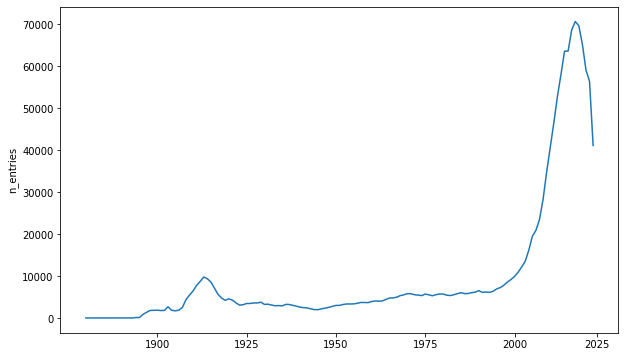

In [ ]:
fig,ax = plt.subplots(figsize=(10,6))
sns.lineplot(data = years_pivot, x = years_pivot.index.values, y = 'n_entries')
plt.xticks(['1900', '1925', '1950', '1975', '2000', '2025'])

## 2) Top rated movies

In [7]:
title_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1920
1,tt0000002,5.8,260
2,tt0000003,6.5,1728
3,tt0000004,5.6,173
4,tt0000005,6.2,2541
...,...,...,...
1241069,tt9916690,7.4,6
1241070,tt9916720,5.3,270
1241071,tt9916730,9.0,6
1241072,tt9916766,6.7,21


In [9]:
condition_ms = title_basics.loc[((title_basics['titleType'] == 'movie') | (title_basics['titleType'] =='short')) & (title_basics['startYear'] <= '2022')]
condition_ms

condition_ms.pivot_table(values = 'tconst', index = 'startYear', aggfunc = 'count')

,tconst
startYear,
1874,1
1877,4
1878,2
1881,2
1882,2
...,...
2018,69678
2019,65284
2020,59193


# TOP rated genres

In [7]:
Title_basics_ratings = pd.merge(title_basics, title_ratings, how='inner', on=['tconst', 'tconst'])
condition_br = Title_basics_ratings.loc[((Title_basics_ratings['titleType'] == 'movie') | (Title_basics_ratings['titleType'] =='short')) & (Title_basics_ratings['startYear'] <= '2022')]
condition_br['wheighted'] = (condition_br['averageRating']*condition_br['numVotes'])/condition_br['numVotes'].sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
#Method str contains:

#Best 10 Documentaries
condition_br = condition_br[condition_br['genres'].str.contains('Documentary')]
condition_br.sort_values(['numVotes', 'averageRating'], ascending = False).head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,wheighted
182309,tt0310793,movie,Bowling for Columbine,Bowling for Columbine,0,2002,\N,120,"Crime,Documentary,Drama",8.0,144903,0.001143
202998,tt0361596,movie,Fahrenheit 9/11,Fahrenheit 9/11,0,2004,\N,122,"Documentary,Drama,War",7.5,129853,0.000960
216230,tt0390521,movie,Super Size Me,Super Size Me,0,2004,\N,100,Documentary,7.2,109104,0.000774
187967,tt0322802,movie,Jackass: The Movie,Jackass: The Movie,0,2002,\N,85,"Action,Comedy,Documentary",6.6,95656,0.000622
259263,tt0497116,movie,An Inconvenient Truth,An Inconvenient Truth,0,2006,\N,96,"Documentary,News",7.4,83529,0.000609
517718,tt11464826,movie,The Social Dilemma,The Social Dilemma,0,2020,\N,94,"Documentary,Drama",7.6,82634,0.000619
735275,tt1702443,movie,Justin Bieber: Never Say Never,Justin Bieber: Never Say Never,0,2011,\N,105,"Documentary,Music",1.6,76275,0.000120
258127,tt0493430,movie,Jackass Number Two,Jackass Number Two,0,2006,\N,92,"Action,Comedy,Documentary",7.0,76160,0.000526
722727,tt1645089,movie,Inside Job,Inside Job,0,2010,\N,109,"Crime,Documentary",8.2,75829,0.000613
214061,tt0386032,movie,Sicko,Sicko,0,2007,\N,123,"Documentary,Drama",8.0,75647,0.000597


In [ ]:
#What genres exist?
list_genres = condition_br['genres'].tolist()
list_genres

In [ ]:
list_genres_s = str(list_genres)
list_genres_s

In [ ]:
list_genres_split = list_genres_s.split(',')
list_genres_split

In [ ]:
def remove_punct(word):
  #words = re.sub('[^\"]', '', word) # removes punctuation [^\w\s]. 
  return word.replace('\'', '').replace(' ', '').replace ('[', '').replace (']', '').remove()

list_genres_split_punct = list(map(remove_punct, list_genres_split)) 
list_genres_split_punct

#there are 9991 \\N

In [54]:
count = pd.Series(list_genres_split_punct).value_counts()
count

Drama          168468
Short          126143
Comedy         103479
Documentary     58446
Romance         37507
Action          34835
Horror          31048
Thriller        28498
Crime           27849
Animation       24802
Adventure       21079
Family          18736
Fantasy         14698
Mystery         14412
Sci-Fi          12258
Biography       10358
\\N              9991
History          9501
Music            9302
Musical          7672
War              6881
Western          5723
Adult            4328
Sport            4243
News             1111
Film-Noir         847
Reality-TV         86
Talk-Show          30
Game-Show          11
dtype: int64

In [87]:
genres_group = Title_basics_ratings['genres'].str.contains('Drama').mean() #groupby(Title_basics_ratings['averageRating']).count()
genres_group

0.33725118284837624

In [82]:
genres_group = Title_basics_ratings['genres'].str.contains('Drama').groupby(Title_basics_ratings['averageRating']).count()
genres_group

averageRating
1.0     1166
1.1      284
1.2      449
1.3      267
1.4      389
        ... 
9.6     3685
9.7     2360
9.8     2577
9.9     1195
10.0    5954
Name: genres, Length: 91, dtype: int64

In [86]:
genres_group_pivot = pd.pivot_table(Title_basics_ratings, index = Title_basics_ratings['genres'].str.contains('Drama'), columns = Title_basics_ratings['averageRating'], aggfunc = 'mean')
genres_group_pivot


numVotes                                                   \
averageRating        1.0          1.1         1.2         1.3         1.4    
genres                                                                       
False           91.654749   177.830508  186.797386  422.513761  260.085987   
True           381.675277  2296.875000  370.783217  104.183673  118.400000   

                                                                            \
averageRating        1.5         1.6         1.7         1.8          1.9    
genres                                                                       
False          526.060606  645.636364  293.005450  253.552279  1196.587940   
True           928.455882  314.521739  393.863636  199.260870   365.773196   

               ...                                                      \
averageRating  ...         9.1          9.2          9.3          9.4    
genres         ...                                                       
False          ...   306.886103   279.247777   380.373570   262.852032   
True           ...  1143.754826  2151.106865  2498.988359  1285.729773   

                                                                             \
averageRating         9.5         9.6         9.7         9.8          9.9    
genres                                                                        
False           371.311904  240.747037  274.883298  361.781134   623.604716   
True           2140.115324  657.184440  994.432723  493.098429  1639.987342   

                          
averageRating       10.0  
genres                    
False          19.751182  
True           98.455307  

[2 rows x 91 columns]

In [ ]:
# # On a entry it works:
# # list_genres_split = list_genres[0].split(',')
# # list_genres_split

# #Now, in the whole list:

# # def list_(words):
# #   return words in 

# # print(list(map(list_, list_genres)))

# def sentence_split(list_sentences):
#     return list_sentences[0].split(',')

# print(list(filter(sentence_split, list_genres)))


# # genres_split = condition_br['genres'].apply(sentence_split)
# # genres_split

# # list_genres_ss = list(filter(sentence, list_genres_s))
# # list_genres_ss

In [ ]:
import nltk
nltk.download()

In [140]:
word = nltk.sent_tokenize(list_genres_s)
word

["['Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short,Sport', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Comedy,Documentary,Short', 'Documentary,Short', 'Documentary,Short,Sport', 'Documentary,Short', 'Comedy,Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Documentary,Short', 'Docu

In [141]:
from collections import Counter

items = Counter(list_genres_s).keys()
items

dict_keys(['[', "'", 'D', 'o', 'c', 'u', 'm', 'e', 'n', 't', 'a', 'r', 'y', ',', 'S', 'h', ' ', 'p', 'C', 'd', 'N', 'w', 's', 'H', 'i', 'W', 'A', 'v', 'F', 'M', 'B', 'g', 'l', 'T', 'R', '-', 'V', 'k', ']'])

In [68]:
#How many movies+shorts by genre
condition_br['genres'].str.contains('Documentary').value_counts() #58446
condition_br['genres'].str.contains('Crime').value_counts() #702
condition_br['genres'].str.contains('Drama').value_counts() #3393
condition_br['genres'].str.contains('War').value_counts() #927


False    57519
True       927
Name: genres, dtype: int64

In [ ]:
#Method Exploding column genres
# condition_br[['genres exploded1', 'genres exploded2', 'genres exploded3']] = condition_br['genres'].str.split(',', expand = True)
# condition_br